In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/customer satification dataset for airline.csv")

In [3]:
df = pd.DataFrame(data)


In [9]:
df = pd.get_dummies(df, drop_first=True)

In [10]:
scaler = MinMaxScaler() # Create a MinMaxScaler object
normalized_data = scaler.fit_transform(df) # Fit the scaler to the data and transform the data
normalized_df = pd.DataFrame(normalized_data, columns=df.columns) # Convert the normalized data back to a DataFrame
normalized_df.head(3)

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,...,Baggage Handling,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus,Satisfaction Rating_Neutral,Satisfaction Rating_Satisfied,Satisfaction Rating_Very Dissatisfied,Satisfaction Rating_Very Satisfied
0,0.525641,0.191858,0.001967,0.004946,0.6,0.50,0.75,0.5,0.50,0.5,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.358974,0.191858,0.025565,0.038576,0.4,0.25,0.50,1.0,0.25,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.435897,0.200000,0.000000,0.000000,0.8,0.75,0.75,1.0,0.75,0.5,...,0.5,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [11]:

distances = pdist(normalized_df, metric='euclidean')

In [12]:
L = linkage(distances, method='ward') # L is the linkage matrix; note you also use directly metric='euclidean' in linkage function

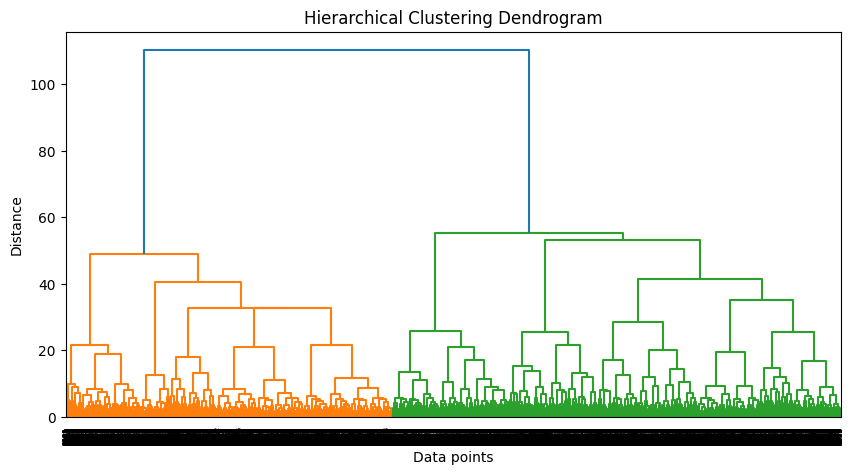

In [13]:

plt.figure(figsize=(10, 5))
dendrogram(L)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()

In [19]:
n_clusters = 6 # Assign observations to clusters  ???
clusters = fcluster(L, t=n_clusters, criterion='maxclust')
print(clusters)


[2 2 2 ... 3 1 1]


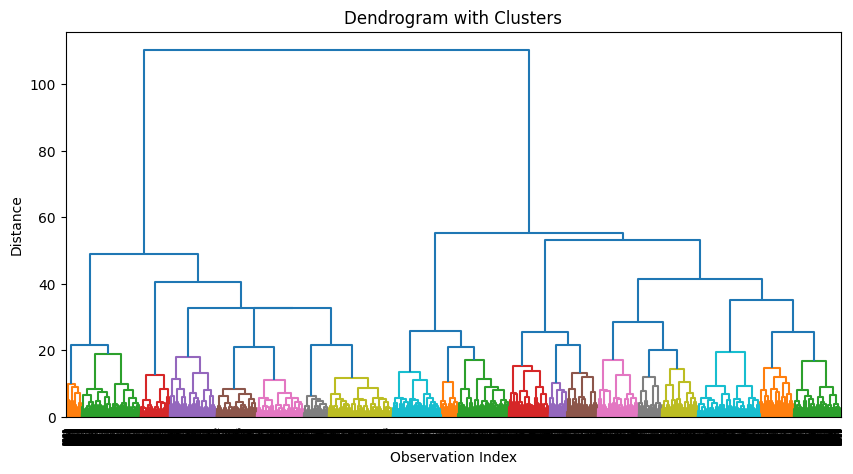

In [22]:
plt.figure(figsize=(10, 5))
dendrogram(L, color_threshold=20, labels=df.index)
plt.title('Dendrogram with Clusters')
plt.xlabel('Observation Index')
plt.ylabel('Distance')
plt.show()

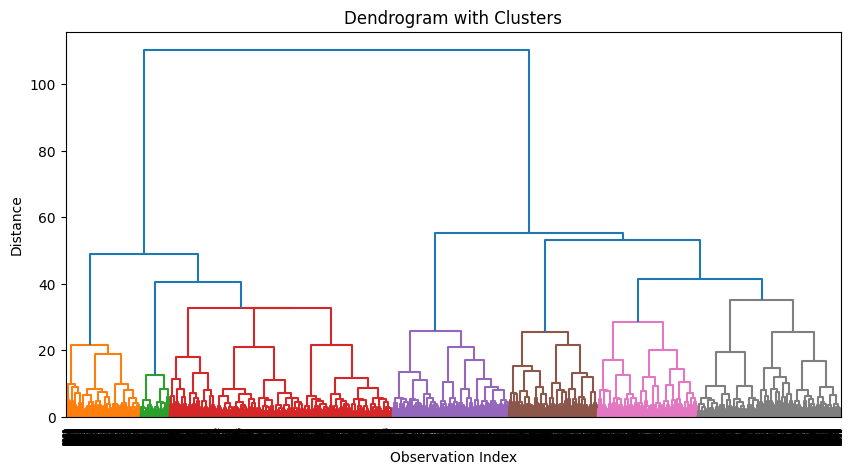

In [23]:
plt.figure(figsize=(10, 5))
dendrogram(L, color_threshold=40, labels=df.index)
plt.title('Dendrogram with Clusters')
plt.xlabel('Observation Index')
plt.ylabel('Distance')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9342 entries, 0 to 9341
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Age                                     9342 non-null   int64
 1   Flight Distance                         9342 non-null   int64
 2   Departure Delay in Minutes              9342 non-null   int64
 3   Arrival Delay in Minutes                9342 non-null   int64
 4   Departure and Arrival Time Convenience  9342 non-null   int64
 5   Ease of Online Booking                  9342 non-null   int64
 6   Check-in Service                        9342 non-null   int64
 7   Online Boarding                         9342 non-null   int64
 8   Gate Location                           9342 non-null   int64
 9   On-board Service                        9342 non-null   int64
 10  Seat Comfort                            9342 non-null   int64
 11  Leg Room Service 

cluster
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
2    Axes(0.125,0.11;0.775x0.77)
3    Axes(0.125,0.11;0.775x0.77)
4    Axes(0.125,0.11;0.775x0.77)
5    Axes(0.125,0.11;0.775x0.77)
6    Axes(0.125,0.11;0.775x0.77)
dtype: object

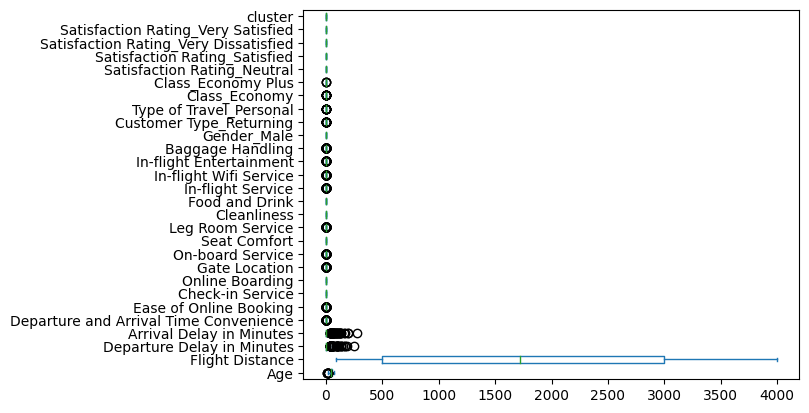

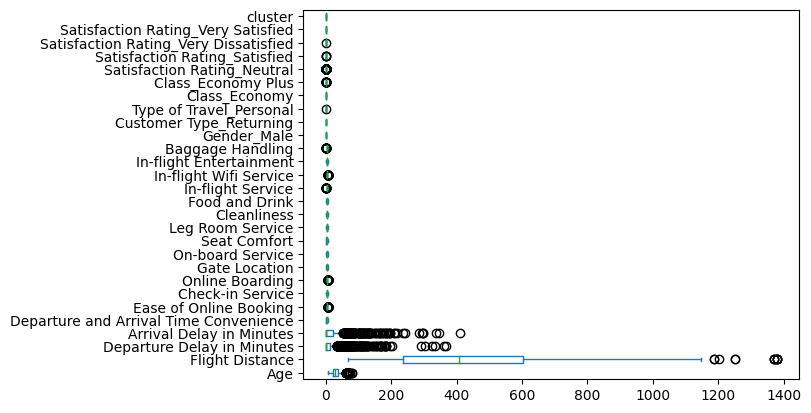

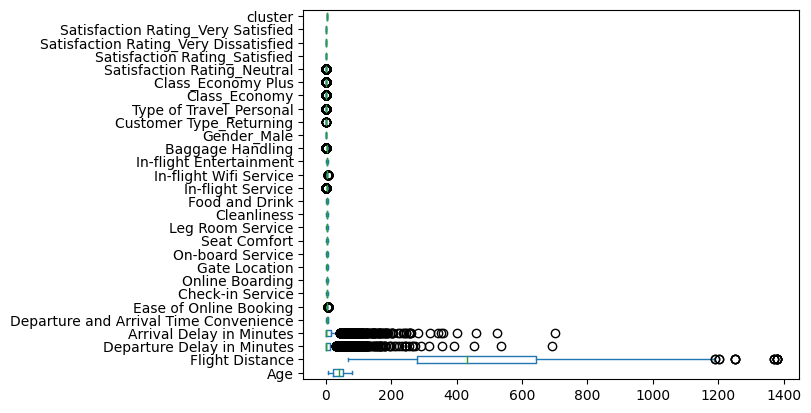

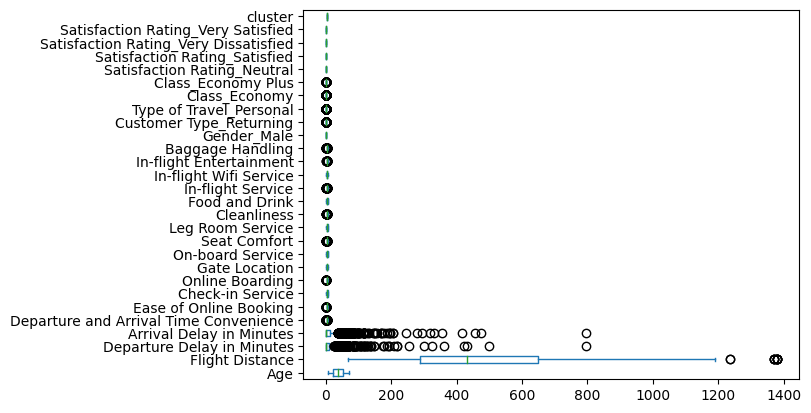

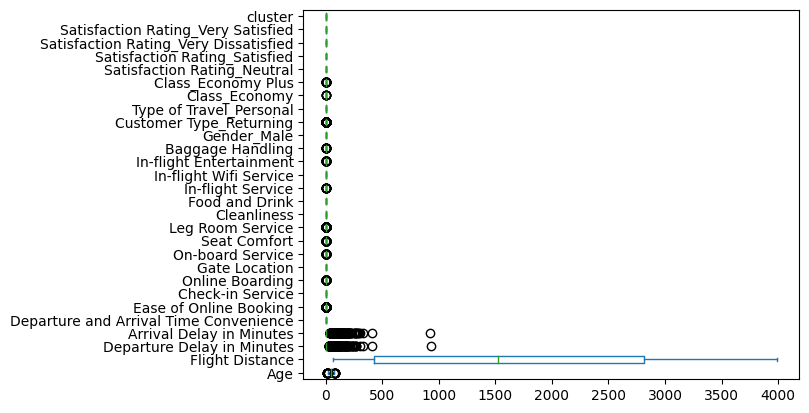

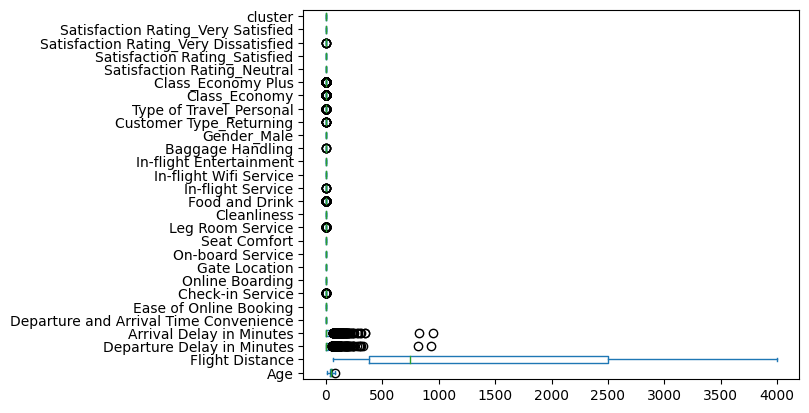

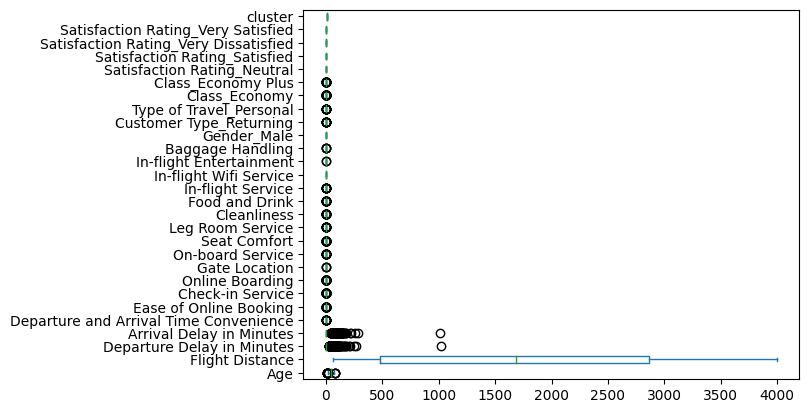

In [27]:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7)
kmeans.fit(normalized_df) # fit k-means object to data
labels = kmeans.labels_ # get cluster assignments for each data point
df['cluster'] = labels # add cluster labels to dataframe
print(df.info(),'\n')
print(df.head(),'\n')
print(df.groupby('cluster').mean())
print(df.groupby('cluster').describe())
df.groupby('cluster').plot.box(vert=False)
